## 1. Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

## 2. Veri Setinin Yüklenmesi

In [2]:
df=pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 3. Veri Ön İşleme

### Exploratory Data Analysis (Keşifsel Veri Analizi)

In [4]:
#pandas tüm sütunları gçster
pd.set_option("display.max_columns",None)

In [5]:
#veriye gözat
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#veri hakkında bilgi al
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# veri setini incele
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
#maximum yatak odası sayısı
df['bedrooms'].max()

33

<Axes: ylabel='Frequency'>

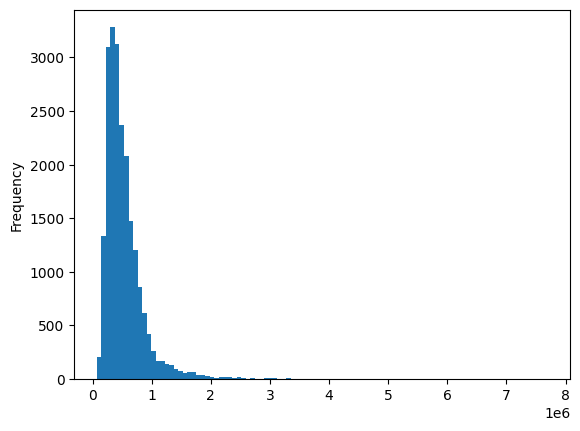

In [9]:
df.price.plot(kind='hist',bins=100)

In [10]:
df[df['price']==df['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [11]:
#veri setinin şekli  satır*sütun
df.shape

(21613, 21)

### Korelasyon

In [12]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### Aykırı Değerleri İncelemek

In [13]:
df2=df.copy()

In [14]:
df_bedrooms_outliers_max=df2[df2['bedrooms']>df2['bedrooms'].mean()+3*df2['bedrooms'].std()]

In [15]:
df2['bedrooms'].mean()

3.37084162309721

In [16]:
df2['bedrooms'].std()

0.9300618311474517

In [17]:
3.4+3*0.93 #bedrooms ta 6 dan büyük olanlar aykırı değer

6.1899999999999995

In [18]:
df_bedrooms_outliers_max

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,20140620T000000,1950000.0,7,3.50,4640,15235,2.0,0,1,3,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
1135,4024100951,20150105T000000,420000.0,7,3.00,2940,8624,1.0,0,0,3,8,1690,1250,1977,0,98155,47.7555,-122.307,1850,8031
1241,7227802030,20140623T000000,350000.0,7,3.00,2800,9569,1.0,0,2,3,7,1400,1400,1963,0,98056,47.5102,-122.183,2150,7333
1660,9126101740,20141204T000000,490000.0,8,5.00,2800,2580,2.0,0,0,3,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
3721,5451100490,20150115T000000,884900.0,7,4.75,5370,10800,1.5,0,0,3,8,5370,0,1967,0,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18823,4040500100,20141020T000000,539000.0,7,2.25,2620,6890,2.0,0,0,4,7,2620,0,1961,0,98007,47.6123,-122.134,2070,7910
18975,1778360150,20140620T000000,1240000.0,7,5.50,6630,13782,2.0,0,0,3,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
19302,3756900027,20141125T000000,575000.0,8,3.00,3840,15990,1.0,0,0,3,7,2530,1310,1961,0,98034,47.7111,-122.211,1380,8172


In [19]:
df_bedrooms_outliers_min=df2[df2['bedrooms']<df2['bedrooms'].mean()-3*df2['bedrooms'].std()]

In [20]:
df_bedrooms_outliers_min

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [21]:
3.4-3*0.93 # 1 den küçük yatak odası sayısı ve 6 dan büyük yatak odası sayısı aykırı değer olarak hesaplanmıştır.

0.6099999999999999

### Quantile Yöntemi

In [22]:
df_kor=df[['price','bedrooms','bathrooms',
           'sqft_living','sqft_lot']]

In [23]:
outliers=df_kor.quantile(q=0.99) # Yüzde 99 u kapsayacak şekilde

In [24]:
outliers.head() #outlier ,99 aldıktan sonra max değerler

price          1964400.00
bedrooms             6.00
bathrooms            4.25
sqft_living       4978.80
sqft_lot        213008.00
Name: 0.99, dtype: float64

In [25]:
df3=df2[df2['price']<=outliers['price']]

In [26]:
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.139600e+04,2.139600e+04,21396.000000,21396.000000,21396.000000,2.139600e+04,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000
mean,4.586696e+09,5.181153e+05,3.360909,2.097460,2050.491400,1.499324e+04,1.490512,0.005328,0.216255,3.408254,7.626239,1766.210273,284.281127,1970.989250,82.271593,98078.083333,47.559458,-122.213655,1971.608058,12696.709712
std,2.877291e+09,2.845875e+05,0.923862,0.746921,861.406875,4.097949e+04,0.539255,0.072801,0.729263,0.649551,1.135380,791.592670,430.401009,29.307383,396.793784,53.470361,0.139050,0.141226,668.096205,27203.764165
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124547e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.750000,0.000000,98033.000000,47.469075,-122.329000,1480.000000,5100.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.575500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000
75%,7.320653e+09,6.350000e+05,4.000000,2.500000,2520.000000,1.054850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10021.250000
max,9.900000e+09,1.960000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [27]:
df3=df3[df3['bedrooms']<=outliers['bedrooms']]
df3['bedrooms'].max()

6

In [28]:
df3=df3[df3['bathrooms']<=outliers['bathrooms']]
df3['bathrooms'].max()

4.25

In [29]:
df3[df3['bathrooms']==4.25]
df3=df3[df3['sqft_living']<outliers['sqft_living']]
df3=df3[df3['sqft_lot']<outliers['sqft_lot']]
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.093400e+04,2.093400e+04,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000,20934.000000
mean,4.618212e+09,5.097479e+05,3.336152,2.070018,2012.470717,11724.007739,1.484786,0.005207,0.205216,3.411531,7.596637,1734.786042,277.684676,1970.695471,81.320627,98078.637384,47.559944,-122.216148,1954.668530,11019.741712
std,2.875372e+09,2.737085e+05,0.865908,0.709541,800.081341,18879.624339,0.539019,0.071972,0.710069,0.651008,1.102279,745.638802,418.545452,29.336600,394.587560,53.581685,0.138804,0.139684,648.053055,19107.014535
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000
25%,2.143976e+09,3.190000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.470100,-122.330000,1480.000000,5055.750000
50%,3.964400e+09,4.450000e+05,3.000000,2.250000,1890.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98070.000000,47.571100,-122.234500,1820.000000,7543.000000
75%,7.340601e+09,6.250000e+05,4.000000,2.500000,2490.000000,10317.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,540.000000,1996.000000,0.000000,98118.000000,47.678800,-122.128000,2320.000000,9900.000000
max,9.900000e+09,1.960000e+06,6.000000,4.250000,4970.000000,212639.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4930.000000,2350.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


In [30]:
df.shape,df3.shape

((21613, 21), (20934, 21))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


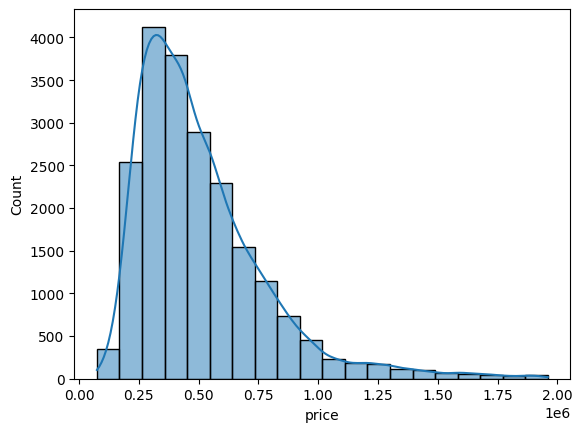

In [31]:
sns.histplot(df3['price'],bins=20,kde=True);

In [32]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20934.0,4.618212e+09,2.875372e+09,1.000102e+06,2.143976e+09,3.964400e+09,7.340601e+09,9.900000e+09
price,20934.0,5.097479e+05,2.737085e+05,7.500000e+04,3.190000e+05,4.450000e+05,6.250000e+05,1.960000e+06
bedrooms,20934.0,3.336152e+00,8.659082e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
bathrooms,20934.0,2.070018e+00,7.095409e-01,0.000000e+00,1.500000e+00,2.250000e+00,2.500000e+00,4.250000e+00
sqft_living,20934.0,2.012471e+03,8.000813e+02,2.900000e+02,1.410000e+03,1.890000e+03,2.490000e+03,4.970000e+03
sqft_lot,20934.0,1.172401e+04,1.887962e+04,5.200000e+02,5.000000e+03,7.500000e+03,1.031775e+04,2.126390e+05
floors,20934.0,1.484786e+00,5.390190e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,20934.0,5.206841e-03,7.197206e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,20934.0,2.052164e-01,7.100695e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,20934.0,3.411531e+00,6.510084e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [33]:
df3.zipcode.dtype #.zipcode yazarak kullanabilirsin

dtype('int64')

In [34]:
df3['zipcode']=df3['zipcode'].astype('category')

In [35]:
df3.zipcode.dtype

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False, categories_dtype=int64)

In [36]:
df3.zipcode.nunique() # 70 kategori 

70

In [37]:
len (df3.zipcode.unique() )

70

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20934 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20934 non-null  int64   
 1   date           20934 non-null  object  
 2   price          20934 non-null  float64 
 3   bedrooms       20934 non-null  int64   
 4   bathrooms      20934 non-null  float64 
 5   sqft_living    20934 non-null  int64   
 6   sqft_lot       20934 non-null  int64   
 7   floors         20934 non-null  float64 
 8   waterfront     20934 non-null  int64   
 9   view           20934 non-null  int64   
 10  condition      20934 non-null  int64   
 11  grade          20934 non-null  int64   
 12  sqft_above     20934 non-null  int64   
 13  sqft_basement  20934 non-null  int64   
 14  yr_built       20934 non-null  int64   
 15  yr_renovated   20934 non-null  int64   
 16  zipcode        20934 non-null  category
 17  lat            20934 non-null  float

### Ağırlık

In [39]:
df3.bedrooms=df3.bedrooms**2 #yatak odası sayısı fiyat üzerinde dominant bir etkiye sahip olduğu için

In [40]:
df3.bathrooms=df3.bathrooms**2

In [41]:
df3.sqft_living=df3.sqft_living**2

In [42]:
df['yr_built'].max()

2015

In [43]:
df['yr_built'].min()

1900

In [44]:
df[df['yr_built']==1900]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
115,3626039325,20141121T000000,740500.0,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350
498,9274202270,20140818T000000,625000.0,2,1.50,1490,5750,1.5,0,0,4,7,1190,300,1900,0,98116,47.5872,-122.390,1590,4025
537,5694500105,20141204T000000,595000.0,2,2.00,1510,4000,1.0,0,0,4,7,1010,500,1900,0,98103,47.6582,-122.345,1920,4000
703,7011200260,20141219T000000,485000.0,4,2.00,1400,3600,1.0,0,0,3,7,1100,300,1900,0,98119,47.6385,-122.370,1630,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19063,1702901340,20140613T000000,718500.0,3,2.00,2910,6600,2.0,0,0,4,7,1920,990,1900,1988,98118,47.5576,-122.281,1370,5500
19137,3388110230,20140729T000000,179000.0,4,1.75,1790,7175,1.5,0,0,3,6,1410,380,1900,0,98168,47.4963,-122.318,1790,8417
19319,4083302225,20141014T000000,850000.0,4,3.00,2550,3784,1.5,0,0,4,8,1750,800,1900,0,98103,47.6559,-122.338,2100,4560
19385,2420069042,20150424T000000,240000.0,3,2.00,1553,6550,1.0,0,0,3,7,1553,0,1900,2001,98022,47.2056,-121.994,1010,10546


In [45]:
df3['age']=2015-df3.yr_built

In [46]:
df3['age'].max()

115

In [47]:
# restorasyon 
df3['yr_renovated'].max()

2015

In [48]:
df3['koordinat']=df3['lat'].astype('str')+','+df3['long'].astype('str')
df3['koordinat'].head()

0    47.5112,-122.257
1     47.721,-122.319
2    47.7379,-122.233
3    47.5208,-122.393
4    47.6168,-122.045
Name: koordinat, dtype: object

In [49]:
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,koordinat
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,60,"47.5112,-122.257"
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,64,"47.721,-122.319"
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,"47.7379,-122.233"
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50,"47.5208,-122.393"
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,"47.6168,-122.045"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6,"47.6993,-122.346"
21609,6600060120,20150223T000000,400000.0,16,6.2500,5336100,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1,"47.5107,-122.362"
21610,1523300141,20140623T000000,402101.0,4,0.5625,1040400,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,"47.5944,-122.299"
21611,291310100,20150116T000000,400000.0,9,6.2500,2560000,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,11,"47.5345,-122.069"


In [50]:
df3['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 20934, dtype: int64

In [51]:
df3['yr_renovated']=np.where(df3['yr_renovated']==0,0,1)
#np.where
#yr_renocvated 0 a eşitse 0 olsun değilse 1

In [52]:
df3['yr_renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: yr_renovated, Length: 20934, dtype: int64

In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20934 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20934 non-null  int64   
 1   date           20934 non-null  object  
 2   price          20934 non-null  float64 
 3   bedrooms       20934 non-null  int64   
 4   bathrooms      20934 non-null  float64 
 5   sqft_living    20934 non-null  int64   
 6   sqft_lot       20934 non-null  int64   
 7   floors         20934 non-null  float64 
 8   waterfront     20934 non-null  int64   
 9   view           20934 non-null  int64   
 10  condition      20934 non-null  int64   
 11  grade          20934 non-null  int64   
 12  sqft_above     20934 non-null  int64   
 13  sqft_basement  20934 non-null  int64   
 14  yr_built       20934 non-null  int64   
 15  yr_renovated   20934 non-null  int64   
 16  zipcode        20934 non-null  category
 17  lat            20934 non-null  float

In [54]:
# Bodrum var yok 
df3['sqft_basement']=np.where(df3['sqft_basement']==0,0,1)
df3['sqft_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: sqft_basement, Length: 20934, dtype: int64

In [55]:
df3['sqft_all']=df3['sqft_living']+df3['sqft_basement']+df3['sqft_above']
df3['sqft_all']

0        1393580
1        6607071
2         593670
3        3842651
4        2824080
          ...   
21608    2342430
21609    5338410
21610    1041420
21611    2561600
21612    1041420
Name: sqft_all, Length: 20934, dtype: int64

### Özellikleri ve hedefi belirleme (X,y)

X=Evin fiyatını etkileyen özellikler, features, özenitelikler, bağımsız değişkenler

y=Evin fiyatı, hedef değişken, bağımlı değişken

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [57]:
y=df3['price']
X=df3.drop(['price','date','lat','long','koordinat'],axis=1) 

In [58]:
X

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,age,sqft_all
0,7129300520,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,60,1393580
1,6414100192,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,1,1951,1,98125,1690,7639,64,6607071
2,5631500400,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,82,593670
3,2487200875,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,1,1965,0,98136,1360,5000,50,3842651
4,1954400510,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,28,2824080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,6,2342430
21609,6600060120,16,6.2500,5336100,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,1,5338410
21610,1523300141,4,0.5625,1040400,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,6,1041420
21611,291310100,9,6.2500,2560000,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,11,2561600


In [59]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 20934, dtype: float64

In [60]:
type(X)

pandas.core.frame.DataFrame

In [61]:
X.drop('id',axis=1, inplace=True) #id yi sütun oalrak çıkar yerinde değiştir. 
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,age,sqft_all
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,60,1393580
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,1,1951,1,98125,1690,7639,64,6607071
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,82,593670
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,1,1965,0,98136,1360,5000,50,3842651
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,28,2824080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,6,2342430
21609,16,6.2500,5336100,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,1,5338410
21610,4,0.5625,1040400,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,6,1041420
21611,9,6.2500,2560000,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,11,2561600


### Kategorik Verileri Sayıya Çevirmek 

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20934 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       20934 non-null  int64   
 1   bathrooms      20934 non-null  float64 
 2   sqft_living    20934 non-null  int64   
 3   sqft_lot       20934 non-null  int64   
 4   floors         20934 non-null  float64 
 5   waterfront     20934 non-null  int64   
 6   view           20934 non-null  int64   
 7   condition      20934 non-null  int64   
 8   grade          20934 non-null  int64   
 9   sqft_above     20934 non-null  int64   
 10  sqft_basement  20934 non-null  int64   
 11  yr_built       20934 non-null  int64   
 12  yr_renovated   20934 non-null  int64   
 13  zipcode        20934 non-null  category
 14  sqft_living15  20934 non-null  int64   
 15  sqft_lot15     20934 non-null  int64   
 16  age            20934 non-null  int64   
 17  sqft_all       20934 non-null  int64

In [63]:
X=pd.get_dummies(X,columns=['zipcode'],drop_first=True)
X


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age,sqft_all,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,60,1393580,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,1,1951,1,1690,7639,64,6607071,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,82,593670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,1,1965,0,1360,5000,50,3842651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,28,2824080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,6,2342430,False,False,False,False,Fals

In [64]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'age', 'sqft_all', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcod

In [65]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age,sqft_all,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,60,1393580,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,1,1951,1,1690,7639,64,6607071,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,82,593670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,1,1965,0,1360,5000,50,3842651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,28,2824080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Standard Scaler ile Ölçeklendirme

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
X_scaler = scaler.fit_transform(X)
X_scaler

array([[-0.47620682, -1.24665276, -0.86818009, ..., -0.08026399,
        -0.11622231, -0.12199756],
       [-0.47620682,  0.09019927,  0.50409047, ..., -0.08026399,
        -0.11622231, -0.12199756],
       [-1.30304969, -1.24665276, -1.07866072, ..., -0.08026399,
        -0.11622231, -0.12199756],
       ...,
       [-1.30304969, -1.39062144, -0.96084949, ..., -0.08026399,
        -0.11622231, -0.12199756],
       [-0.47620682,  0.4809714 , -0.56079148, ..., -0.08026399,
        -0.11622231, -0.12199756],
       [-1.30304969, -1.39062144, -0.96084949, ..., -0.08026399,
        -0.11622231, -0.12199756]])

In [68]:
X_scaler

array([[-0.47620682, -1.24665276, -0.86818009, ..., -0.08026399,
        -0.11622231, -0.12199756],
       [-0.47620682,  0.09019927,  0.50409047, ..., -0.08026399,
        -0.11622231, -0.12199756],
       [-1.30304969, -1.24665276, -1.07866072, ..., -0.08026399,
        -0.11622231, -0.12199756],
       ...,
       [-1.30304969, -1.39062144, -0.96084949, ..., -0.08026399,
        -0.11622231, -0.12199756],
       [-0.47620682,  0.4809714 , -0.56079148, ..., -0.08026399,
        -0.11622231, -0.12199756],
       [-1.30304969, -1.39062144, -0.96084949, ..., -0.08026399,
        -0.11622231, -0.12199756]])

### Veri Setini Eğitim ve Test Olarak Ayırırız

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y, test_size=0.2 , random_state = 42)

## 4. Modelleme

In [70]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

def algo_test(x, y):
    # Veriyi eğitim ve test olarak bölme
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    # Özellikleri ölçeklendirme
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Modelleri ve isimlerini bir sözlükte saklama
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'SGDRegressor': SGDRegressor(),
        'Extra Tree': ExtraTreeRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'XGBRegressor': XGBRegressor(),
        'SVR': SVR(),
        'MLPRegressor': MLPRegressor()
    }
    
    results = []

    for name, model in models.items():
        # Ölçeklendirilmiş verileri kullanan modeller
        if name in ['SGDRegressor', 'KNeighborsRegressor', 'SVR', 'MLPRegressor']:
            model.fit(x_train_scaled, y_train)
            predictions = model.predict(x_test_scaled)
        else:
            model.fit(x_train, y_train)
            predictions = model.predict(x_test)
        
        r2 = r2_score(y_test, predictions)
        rmse = mean_squared_error(y_test, predictions, squared=False)
        mae = mean_absolute_error(y_test, predictions)
        
        results.append({
            'Model': name,
            'R_Squared': r2,
            'RMSE': rmse,
            'MAE': mae
        })
    
    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values('R_Squared', ascending=False)
    
    # Sonuçları görselleştirme (isteğe bağlı)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(result_df['Model'], result_df['R_Squared'])
    plt.xlabel('R_Squared')
    plt.title('Modellerin R^2 Skorları')
    plt.gca().invert_yaxis()
    plt.show()
    
    return result_df


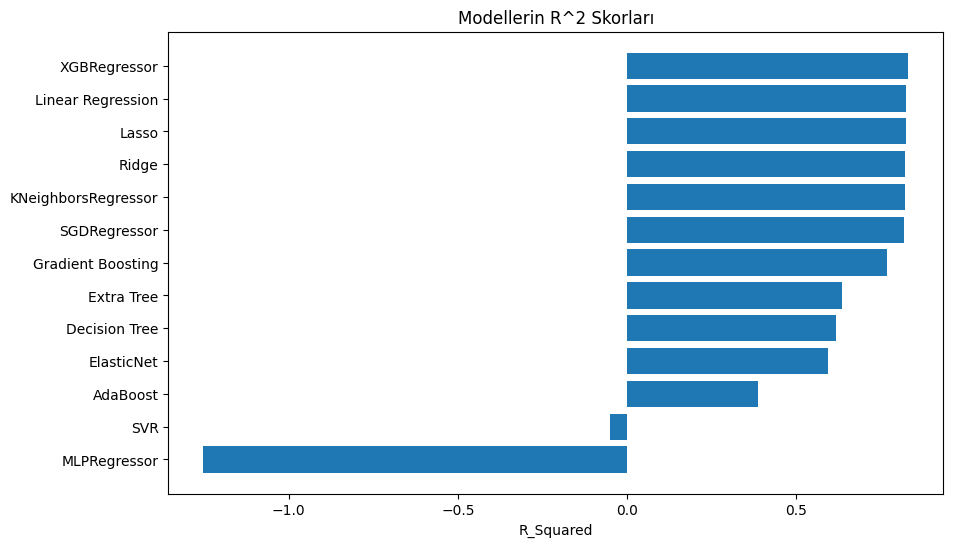

,Model,R_Squared,RMSE,MAE
10,XGBRegressor,0.831001,110104.164799,70410.633385
0,Linear Regression,0.824155,112312.064392,75793.520522
2,Lasso,0.824122,112322.680602,75803.768685
1,Ridge,0.823619,112483.195588,75976.951208
7,KNeighborsRegressor,0.823080,112655.073272,72092.360449
4,SGDRegressor,0.820137,113587.984466,76422.116280
6,Gradient Boosting,0.769313,128639.328722,92072.720125
5,Extra Tree,0.635829,161627.154740,100818.252926
9,Decision Tree,0.617655,165611.280297,105507.149988
3,ElasticNet,0.594489,170554.507223,123417.930065


In [71]:
#tüm modelleri kullan
algo_test(X,y)

## Model Seçimi

In [72]:
from xgboost import XGBRegressor # xgbregrossor u seçtik en uygun model 
#model oluştur
model=XGBRegressor()


## Modeli Eğitme

In [73]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 5. Değerlendirme (Evolation)

In [74]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test) 

In [75]:
#Modelin iyiliğini gösterir 0-1
r2_score(y_test,y_pred)


0.831001199017211

In [76]:
print("MAE")
print(mean_absolute_error(y_test,y_pred))

MAE
70410.6333853296


## Modeli Kaydet

In [77]:
#import pickle
#with open('xgb_model.pkl','wb') as file:
    #pickle.dump(model, file)